# Лабораторная работа. Стационарное уравнение переноса.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
t_0 = 0
t_K = 1
x_0 = 0
x_M = 1

In [41]:
sigma = 0.1
def Gauss(x):
    return np.exp(-0.5 * np.square((x - 0.5) / sigma))

In [54]:
def rectangle_window(x):
    return np.array([1 if el < 0.7 and el > 0.3 else 0 for el in x])

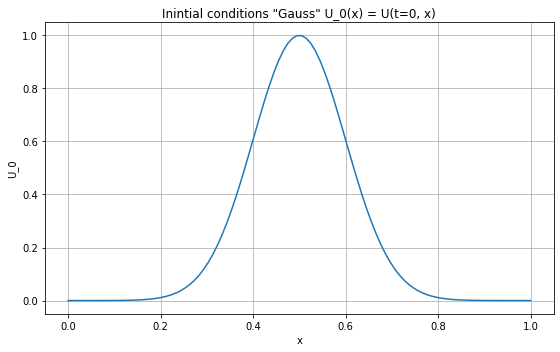

In [43]:
x_band = np.linspace(0, 1, 100)
plt.figure(figsize=[8, 5])
plt.title('Inintial conditions "Gauss" U_0(x) = U(t=0, x)')
plt.xlabel('x')
plt.ylabel('U_0')
plt.tight_layout()
plt.grid()
plt.plot(x_band, Gauss(x_band))

## Схема уголок

In [44]:
def triangle_downwind(a, U_0, M, K, save_period):
    x_band = np.linspace(0, 1, M + 1)
    t_band = np.linspace(0, 1, K + 1)
    h = 1. / M
    tau = 1. / K
    c = a * tau / h
    U_prev = np.array(U_0(x_band))
    output = np.array(U_0(x_band))
    
    for k in range(K):
        U_next = [U_prev[m] + c * (U_prev[m-1] - U_prev[m]) if m != 0
                  else U_prev[0] + c * (U_prev[0] - U_prev[1])
                  for m in range(M + 1)]                      
        
        if k % save_period == 0:
            U_next = np.array(U_next)
            output = np.vstack((output, U_next))
            
        U_prev = U_next.copy()
    
    return output

(101, 101)


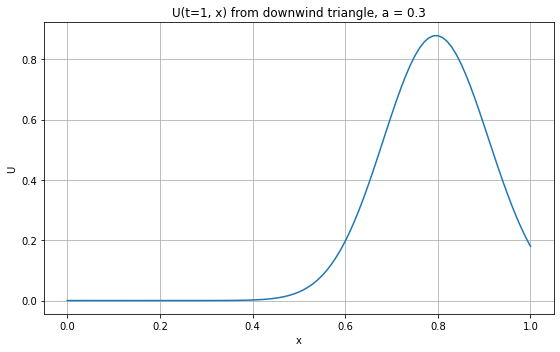

In [45]:
M = 100
K = 10000
a = 0.3
save_period = 100
x_band = np.linspace(0, 1, M+1)
output = triangle_downwind(a, Gauss, M, K, save_period)
plt.figure(figsize=[8, 5])
plt.title('U(t=1, x) from downwind triangle, a = 0.3')
plt.xlabel('x')
plt.ylabel('U')
plt.tight_layout()
plt.grid()
plt.plot(x_band, output[100, ])
print(output.shape)

Text(0.5, 0, 'U')

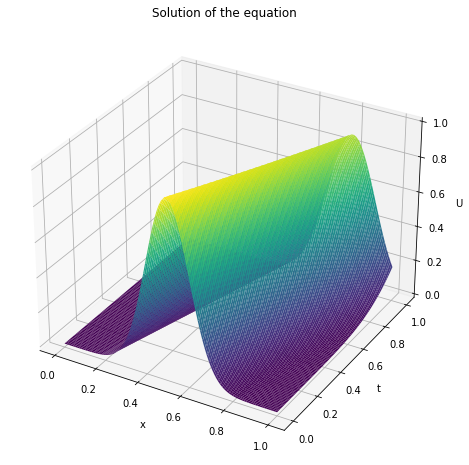

In [46]:
k = np.arange(0, 101)
m = np.arange(0, M + 1)
def arr_U(k, m):
    return output[k, m]
fig = plt.figure(figsize = [8, 8])
ax = plt.axes(projection='3d')
X_0 = np.linspace(0, 1, M+1)
T_0 = np.linspace(0, 1, 101)
X, T = np.meshgrid(X_0, T_0)
k, m = np.meshgrid(k, m)
data_plot = arr_U(k, m)

ax.plot_surface(T, X, data_plot, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Solution of the equation from downwind triangle method')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')

(101, 101)


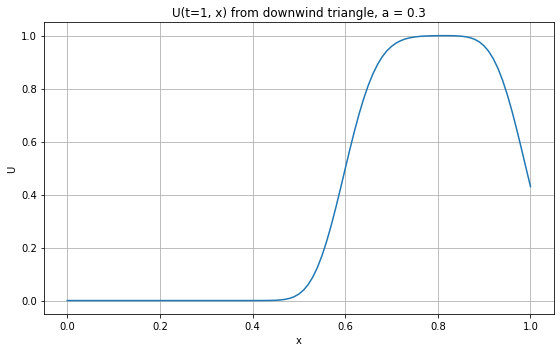

In [62]:
M = 100
K = 10000
a = 0.3
save_period = 100
x_band = np.linspace(0, 1, M+1)
output = triangle_downwind(a, rectangle_window, M, K, save_period)
plt.figure(figsize=[8, 5])
plt.title('U(t=1, x) from downwind triangle, a = 0.3')
plt.xlabel('x')
plt.ylabel('U')
plt.tight_layout()
plt.grid()
plt.plot(x_band, output[100, ])
print(output.shape)

Text(0.5, 0, 'U')

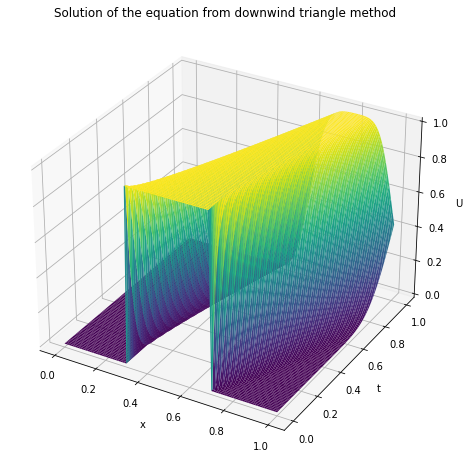

In [63]:
k = np.arange(0, 101)
m = np.arange(0, M + 1)
def arr_U(k, m):
    return output[k, m]
fig = plt.figure(figsize = [8, 8])
ax = plt.axes(projection='3d')
X_0 = np.linspace(0, 1, M+1)
T_0 = np.linspace(0, 1, 101)
X, T = np.meshgrid(X_0, T_0)
k, m = np.meshgrid(k, m)
data_plot = arr_U(k, m)

ax.plot_surface(T, X, data_plot, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Solution of the equation from downwind triangle method')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')

In [47]:
def triangle_upwind(a, U_0, M, K, save_period):
    x_band = np.linspace(0, 1, M + 1)
    t_band = np.linspace(0, 1, K + 1)
    h = 1. / M
    tau = 1. / K
    c = a * tau / h
    U_prev = np.array(U_0(x_band))
    output = np.array(U_0(x_band))
    
    for k in range(K):
        U_next = [U_prev[m] + c * (U_prev[m] - U_prev[m+1]) if m != M 
                  else U_prev[M] + c * (U_prev[M-1] - U_prev[M])
                  for m in range(M + 1)]                       
        
        if k % save_period == 0:
            U_next = np.array(U_next)
            output = np.vstack((output, U_next))
            
        U_prev = U_next.copy()
    
    return output

(101, 101)


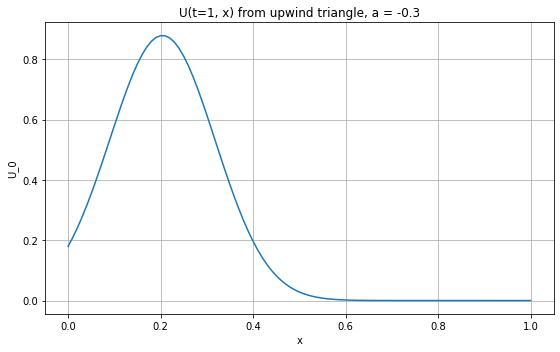

In [48]:
M = 100
K = 10000
a = -0.3
save_period = 100
x_band = np.linspace(0, 1, M+1)
output = triangle_upwind(a, Gauss, M, K, save_period)
plt.figure(figsize=[8, 5])
plt.title('U(t=1, x) from upwind triangle, a = -0.3')
plt.xlabel('x')
plt.ylabel('U_0')
plt.tight_layout()
plt.grid()
plt.plot(x_band, output[100, ])
print(output.shape)

Text(0.5, 0, 'U')

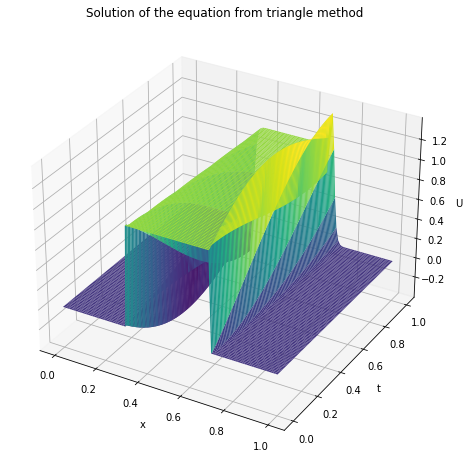

In [61]:
k = np.arange(0, 101)
m = np.arange(0, M + 1)
def arr_U(k, m):
    return output[k, m]
fig = plt.figure(figsize = [8, 8])
ax = plt.axes(projection='3d')
X_0 = np.linspace(0, 1, M+1)
T_0 = np.linspace(0, 1, 101)
X, T = np.meshgrid(X_0, T_0)
k, m = np.meshgrid(k, m)
data_plot = arr_U(k, m)

ax.plot_surface(T, X, data_plot, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Solution of the equation from upwind triangle method')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')

In [50]:
def LW(a, U_0, M, K, save_period):
    x_band = np.linspace(0, 1, M + 1)
    t_band = np.linspace(0, 1, K + 1)
    h = 1. / M
    tau = 1. / K
    c = a * tau / h
    alpha = c / 2.
    beta = c * c / 2.
    U_prev = np.array(U_0(x_band))
    output = np.array(U_0(x_band))
    
    for k in range(K):        
        U_next = [U_prev[m] - alpha * (U_prev[m+1] - U_prev[m-1]) - 
                  beta * (2*U_prev[m] - U_prev[m+1] - U_prev[m-1]) 
                  if m != M and m != 0 
                  else U_prev[m] - alpha * (U_prev[m+2] - U_prev[m]) - 
                  beta * (2*U_prev[m+1] - U_prev[m+2] - U_prev[m])
                  if m == 0
                  else U_prev[m] - alpha * (U_prev[m] - U_prev[m-2]) - 
                  beta * (2*U_prev[m-1] - U_prev[m] - U_prev[m-2])
                  for m in range(M + 1)]                       
        
        if k % save_period == 0:
            U_next = np.array(U_next)
            output = np.vstack((output, U_next))
            
        U_prev = U_next.copy()
    
    return output

(101, 101)


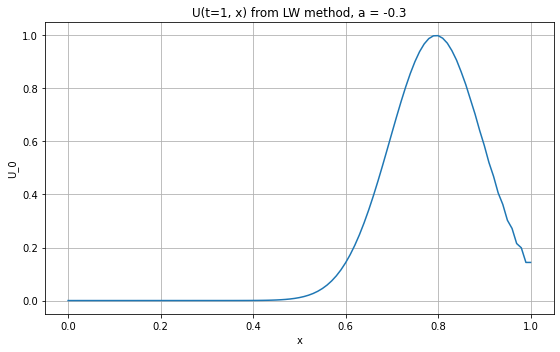

In [51]:
M = 100
K = 10000
a = 0.3
save_period = 100
x_band = np.linspace(0, 1, M+1)
output = LW(a, Gauss, M, K, save_period)
plt.figure(figsize=[8, 5])
plt.title('U(t=1, x) from LW method, a = 0.3')
plt.xlabel('x')
plt.ylabel('U_0')
plt.tight_layout()
plt.grid()
plt.plot(x_band, output[100, ])
print(output.shape)

Text(0.5, 0, 'U')

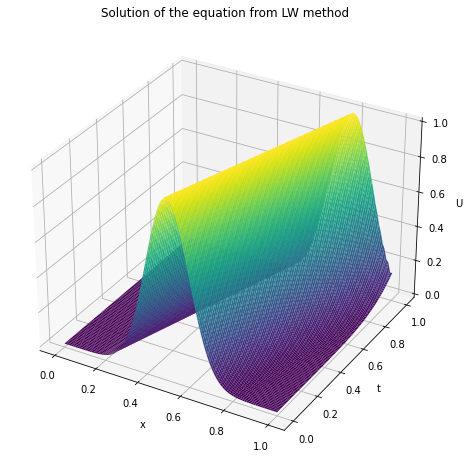

In [52]:
k = np.arange(0, 101)
m = np.arange(0, M + 1)
def arr_U(k, m):
    return output[k, m]
fig = plt.figure(figsize = [8, 8])
ax = plt.axes(projection='3d')
X_0 = np.linspace(0, 1, M+1)
T_0 = np.linspace(0, 1, 101)
X, T = np.meshgrid(X_0, T_0)
k, m = np.meshgrid(k, m)
data_plot = arr_U(k, m)

ax.plot_surface(T, X, data_plot, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Solution of the equation from LW method')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')

(101, 101)


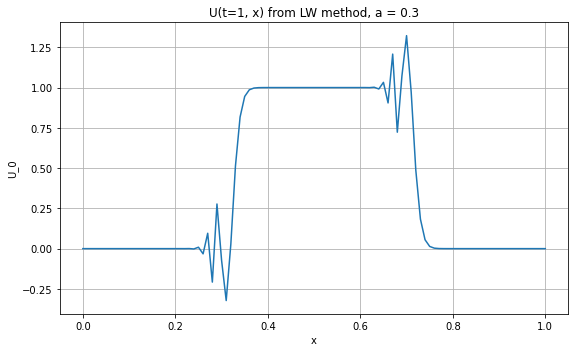

In [59]:
M = 100
K = 10000
a = 0.03
save_period = 100
x_band = np.linspace(0, 1, M+1)
output = LW(a, rectangle_window, M, K, save_period)
plt.figure(figsize=[8, 5])
plt.title('U(t=1, x) from LW method, a = 0.03')
plt.xlabel('x')
plt.ylabel('U_0')
plt.tight_layout()
plt.grid()
plt.plot(x_band, output[100, ])
print(output.shape)

Text(0.5, 0, 'U')

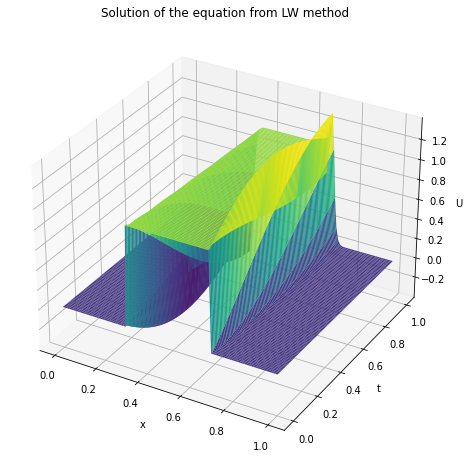

In [60]:
k = np.arange(0, 101)
m = np.arange(0, M + 1)
def arr_U(k, m):
    return output[k, m]
fig = plt.figure(figsize = [8, 8])
ax = plt.axes(projection='3d')
X_0 = np.linspace(0, 1, M+1)
T_0 = np.linspace(0, 1, 101)
X, T = np.meshgrid(X_0, T_0)
k, m = np.meshgrid(k, m)
data_plot = arr_U(k, m)

ax.plot_surface(T, X, data_plot, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Solution of the equation from LW method')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')